In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical libraries
from scipy.stats import skew
from scipy.stats import boxcox

# Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset.
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [3]:
# Dataset size.
df.shape

(614, 13)

##### This dataset contains 614 rows and 13 columns, out of which one column represents the target variable and the remaining columns are independent variables.

In [4]:
# Showing columns.
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Showing column's type.
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Showing sum of null for all the columns.
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Fill missing values based on column type
for col in df.columns:
    if df[col].dtype == 'object':  # category columns
        
        # Fill with the mode (most frequent value)
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    else:  # Numerical columns
        
        # Fill with the median (could use mean as well)
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

In [8]:
# Checking again.
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Checking duplicate values.
df.duplicated().sum()

0

In [10]:
# Showing information with non-null values and the number of columns by data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

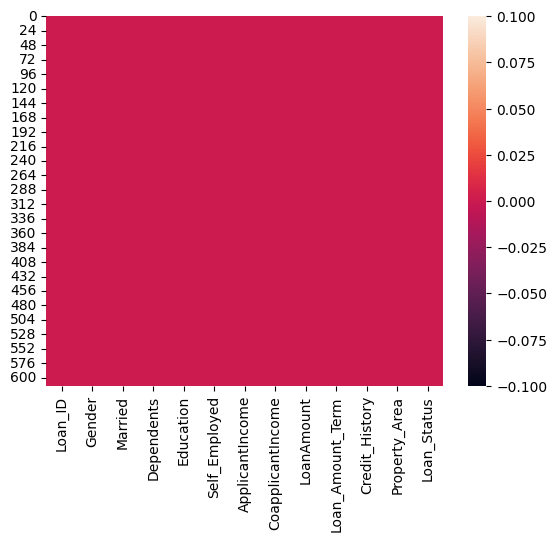

In [11]:
# Showing null values with heatmap.
sns.heatmap(df.isnull())

In [12]:
# Analyzing the dataset.
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Encoding the category columns.

In [13]:
LE = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[col] = LE.fit_transform(df[col])

# Handling '3+' as 3
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Displaying the dataset.
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
# Dropping the Loan_ID which is not required.
df.drop('Loan_ID', axis = 1, inplace = True)

# Univariate Analysis

#### Plotting Distribution of Numerical Variables

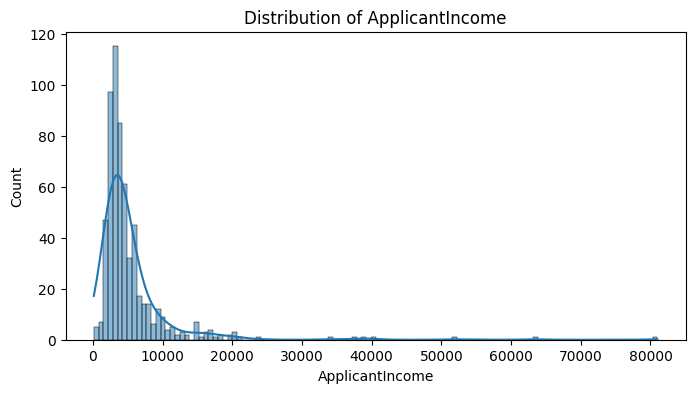

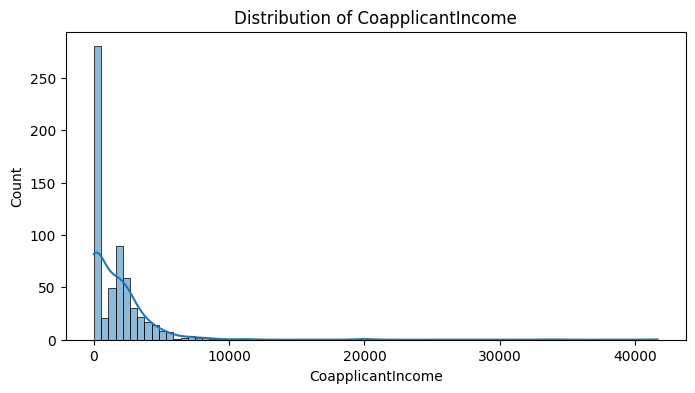

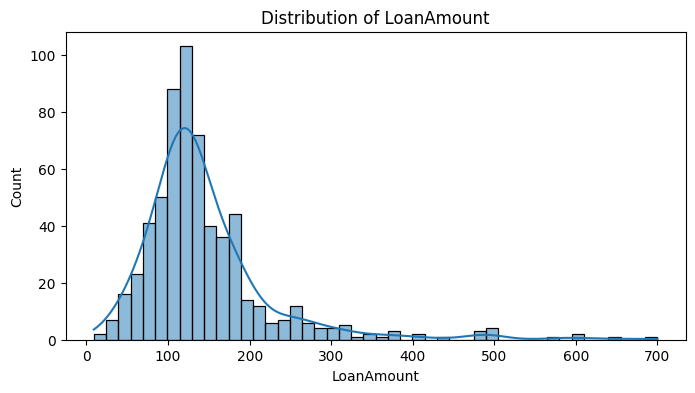

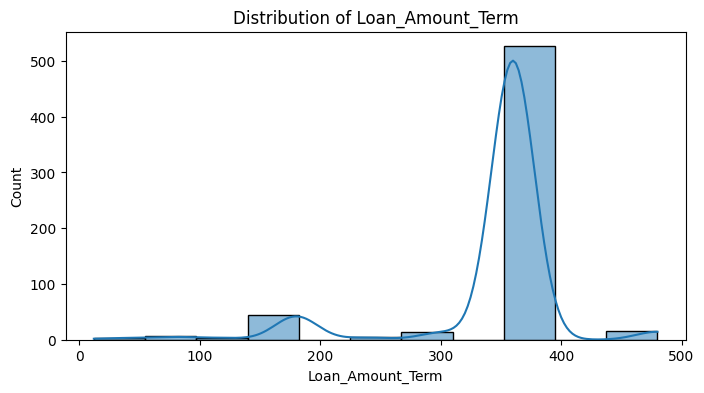

In [15]:
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [16]:
# Showing a summary of information for all datasets.
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [17]:
# We observed the data and found that there are no white spaces or null values, as the counts indicate. 
# The mean and median are almost the same, so, we will look further.
# Additionally, there is a significant difference between the 75th percentile and the maximum value, 
# indicating the presence of outliers in the ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.

### Univariate Analysis

Loan_Status
1    422
0    192
Name: count, dtype: int64

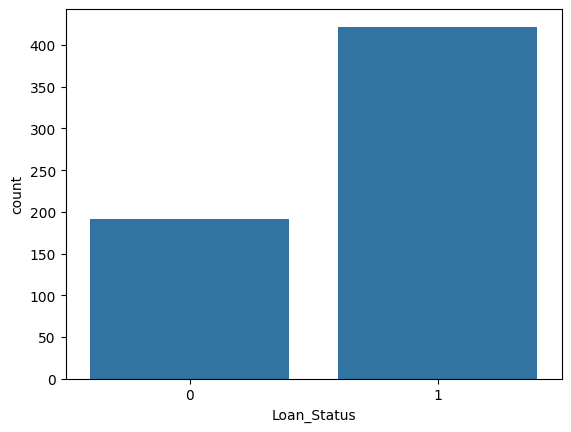

In [18]:
ax = sns.countplot(x= 'Loan_Status', data=df)
df['Loan_Status'].value_counts()

In [19]:
# Displaying in percentage.
class_distribution = df['Loan_Status'].value_counts(normalize=True) * 100
print(class_distribution)

Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64


#### As we can see, there is a significant difference between 'Yes' and 'No', indicating a class imbalance that can be addressed using oversampling methods.

# Checking the Skewness

In [20]:
# Checking skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [21]:
# As observed, some parameters, such as 'Property_Area' and 'Loan_Status' are not exceeding the value -0.5. Additionally, 
# skewness is present in the plot presentation.

### Checking visualization presentation

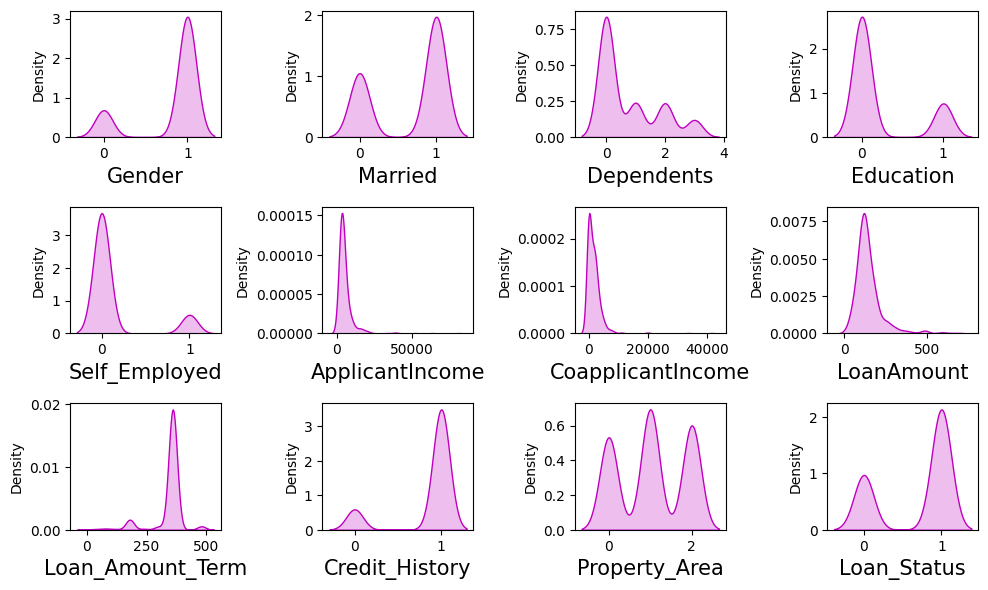

In [22]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Removing the skewness of dataset.

In [23]:
print("Before removing of skewness:\n", df.skew())
for val in zip(df.columns, df.skew()):
    if abs(val[1]) > 0.5:
        df[val[0]] = np.cbrt(df[val[0]])
print()
print("After removing of skewness:\n", df.skew())

Before removing of skewness:
 Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

After removing of skewness:
 Gender              -1.648795
Married             -0.644850
Dependents           0.453698
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64


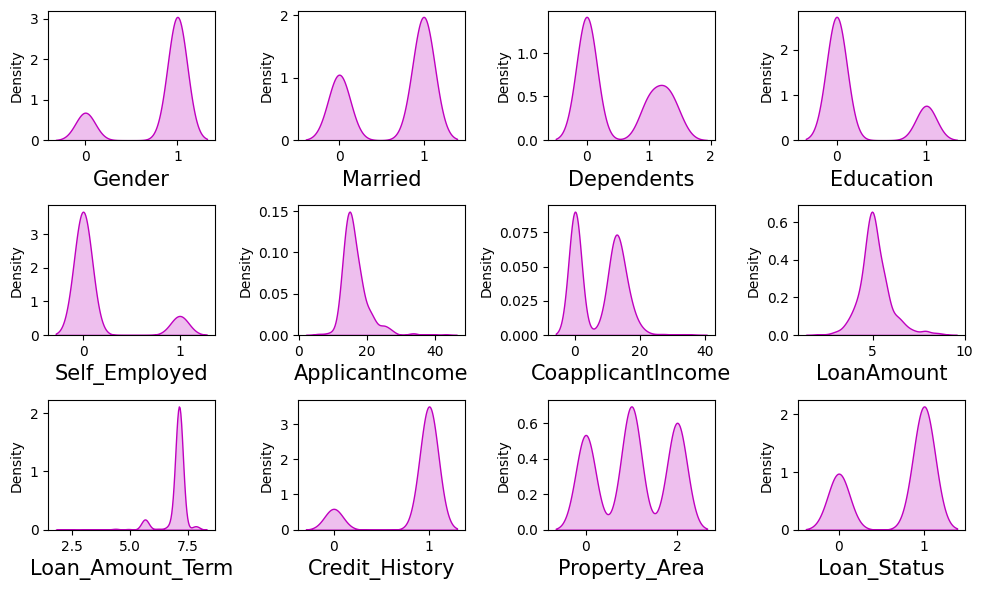

In [24]:
# After removing the skewness of the dataset.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Checking outliers
#### Using Boxplots to Detect Outliers

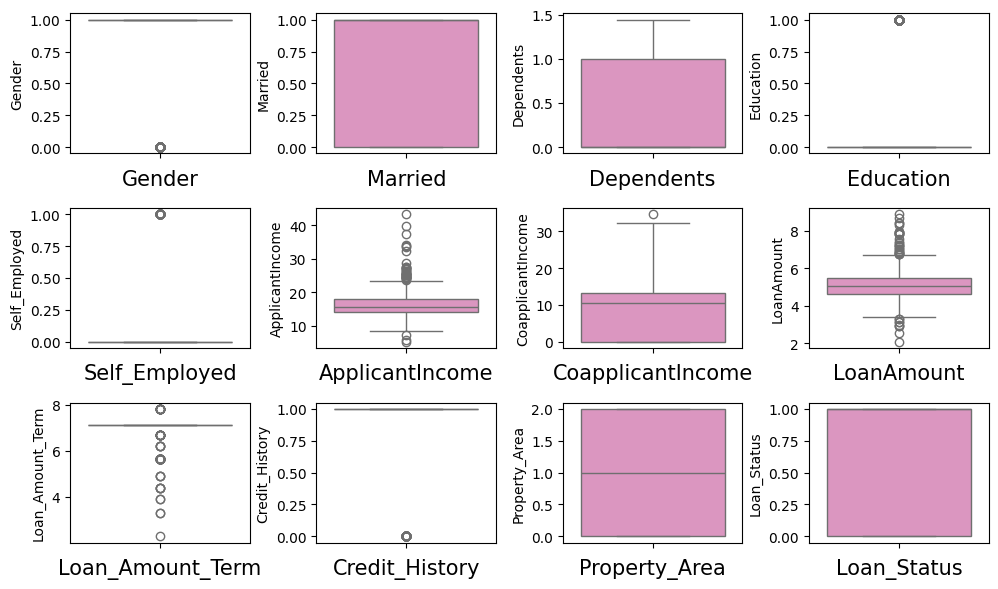

In [25]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [26]:
# Handling outliers - Capping them
for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

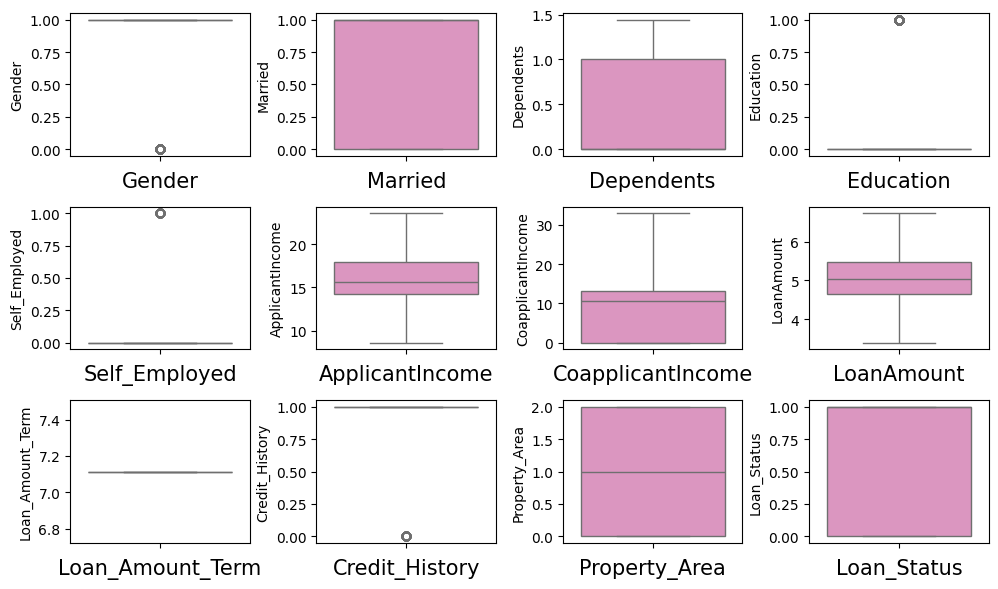

In [27]:
# After removing the outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### We observed that the data for Loan_Amount_Term is not significant due to the presence of outliers. Therefore, we can drop this column.

In [28]:
df.drop('Loan_Amount_Term', axis= 1, inplace= True)

# Correlation Analysis

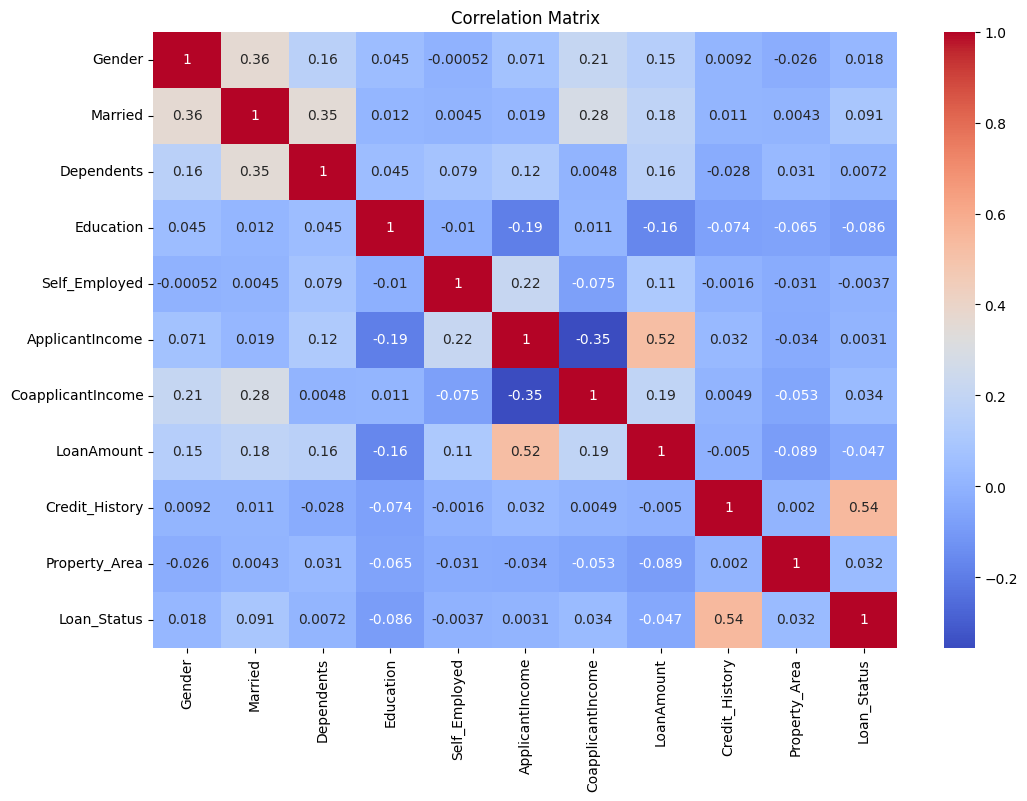

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.163016,0.045364,-0.000525,0.070542,0.209333,0.146875,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.354410,0.012304,0.004489,0.018647,0.281043,0.182815,0.010938,0.004257,0.091478
Dependents,0.163016,0.354410,1.000000,0.044801,0.078667,0.119780,0.004780,0.163464,-0.027970,0.031206,0.007236
Education,0.045364,0.012304,0.044801,1.000000,-0.010383,-0.194932,0.010834,-0.164020,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.078667,-0.010383,1.000000,0.216731,-0.074692,0.111371,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.070542,0.018647,0.119780,-0.194932,0.216731,1.000000,-0.354010,0.521566,0.031972,-0.034151,0.003137
CoapplicantIncome,0.209333,0.281043,0.004780,0.010834,-0.074692,-0.354010,1.000000,0.189547,0.004887,-0.052865,0.034203
LoanAmount,0.146875,0.182815,0.163464,-0.164020,0.111371,0.521566,0.189547,1.000000,-0.005033,-0.088800,-0.047006
Credit_History,0.009170,0.010938,-0.027970,-0.073658,-0.001550,0.031972,0.004887,-0.005033,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,0.031206,-0.065243,-0.030860,-0.034151,-0.052865,-0.088800,0.001963,1.000000,0.032112


In [31]:
# We can observed that is no negative correlation with target value is present inside the data set.
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
CoapplicantIncome    0.034203
Property_Area        0.032112
Gender               0.017987
Dependents           0.007236
ApplicantIncome      0.003137
Self_Employed       -0.003700
LoanAmount          -0.047006
Education           -0.085884
Name: Loan_Status, dtype: float64

In [32]:
# Separating feature and label
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [33]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [34]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] = x.columns

In [35]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature
0,1.196610,Gender
1,1.376965,Married
2,1.189748,Dependents
3,1.071620,Education
4,1.055056,Self_Employed
5,2.063632,ApplicantIncome
6,1.617114,CoapplicantIncome
7,1.801517,LoanAmount
8,1.008761,Credit_History
9,1.019983,Property_Area


In [36]:
# Now we can move to the model building
y.value_counts()

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64

### We can see that there is class imbalance in the target values, so we need to address it by using an oversampling method.

### OverSampling

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [38]:
# We have resolved the class imbalance issue by using oversampling method.
y1.value_counts()

Loan_Status
1.0    422
0.0    422
Name: count, dtype: int64

### Modelling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RER = RandomForestClassifier()
    RER.fit(x_train, y_train)
    pred = RER.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  0.8818897637795275 at random_state  45


In [40]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=maxRs)

In [41]:
# Classification Algorithmfrom 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

## RandomForestClassifier

In [42]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [43]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  87.4015748031496
[[101  18]
 [ 14 121]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       119
         1.0       0.87      0.90      0.88       135

    accuracy                           0.87       254
   macro avg       0.87      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254



## ExtraTreesClassifier

In [44]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  88.18897637795276
[[102  17]
 [ 13 122]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       119
         1.0       0.88      0.90      0.89       135

    accuracy                           0.88       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.88      0.88      0.88       254



## GradientBoostingClassifier

In [45]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  79.92125984251969
[[ 90  29]
 [ 22 113]]
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       119
         1.0       0.80      0.84      0.82       135

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



## BaggingClassifier

In [46]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  81.10236220472441
[[101  18]
 [ 30 105]]
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       119
         1.0       0.85      0.78      0.81       135

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



## LogisticRegression

In [47]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  74.80314960629921
[[ 65  54]
 [ 10 125]]
              precision    recall  f1-score   support

         0.0       0.87      0.55      0.67       119
         1.0       0.70      0.93      0.80       135

    accuracy                           0.75       254
   macro avg       0.78      0.74      0.73       254
weighted avg       0.78      0.75      0.74       254



## SVC

In [48]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  77.55905511811024
[[ 74  45]
 [ 12 123]]
              precision    recall  f1-score   support

         0.0       0.86      0.62      0.72       119
         1.0       0.73      0.91      0.81       135

    accuracy                           0.78       254
   macro avg       0.80      0.77      0.77       254
weighted avg       0.79      0.78      0.77       254



In [49]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.76331361 0.78698225 0.82248521 0.82840237 0.91666667]
0.8235700197238659


0.05044572830763017

In [50]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[0.80473373 0.81065089 0.82840237 0.85798817 0.88690476]
0.8377359819667513


0.044153781812776294

In [51]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.68047337 0.71597633 0.82840237 0.82248521 0.85119048]
0.779705550859397


0.019507047565799907

In [52]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[0.73964497 0.73964497 0.78698225 0.79289941 0.81547619]
0.7749295576218653


0.03609406442537877

In [53]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.68639053 0.73372781 0.72189349 0.65680473 0.67261905]
0.694287123133277


0.05374437292971512

In [54]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[0.72781065 0.75147929 0.66863905 0.68639053 0.75595238]
0.7180543815159199


0.05753616966518238

# As you can see our best model is ExtraTreesClassifier.

In [55]:
# Hyper Parameter Turning
# Extra Tree Classifier
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' : ['gini', 'entropy'],
    'random_state' : [10, 50, 1000],
    'max_depth' : [0, 10, 20],
    'n_jobs' : [-2, -1, 1],
    'n_estimators' : [50, 100, 200, 300]
}
GCV = GridSearchCV(ExtraTreesClassifier(), parameter, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [56]:
Final_model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators= 100, n_jobs=-2, random_state=maxRs)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.8582677165354331

## AUC and ROC

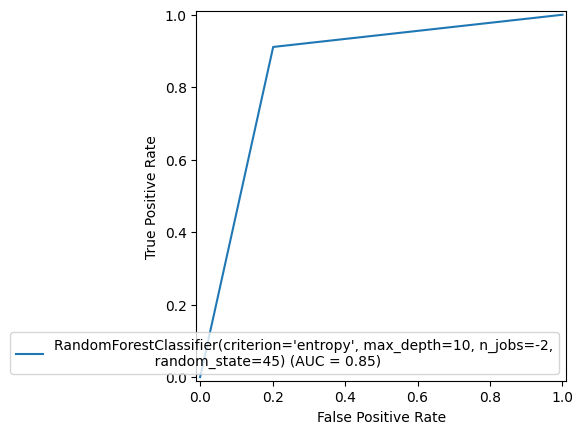

In [57]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

In [58]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, 'Loan_application_status_prediction.pkl')

['Loan_application_status_prediction.pkl']

In [59]:
# Predicting the saved model
model = joblib.load('Loan_application_status_prediction.pkl')
prediction = model.predict(x_test)

In [60]:
# Confirming
a = np.array(y_test)
df = pd.DataFrame()
df['Predict'] = prediction
df['Original'] = a
df

,Predict,Original
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
249,0.0,0.0
250,0.0,0.0
251,0.0,0.0
252,0.0,0.0
